In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Новый подход

In [2]:
def F_M(M, betta):
    return np.sqrt((M**2 + 2/(Gam - 1))/(2 * Gam/(Gam - 1) * M**2 * np.sin(betta)**2 - 1) +
                (M**2 * np.cos(betta)**2)/((Gam - 1)/2 * M**2 * np.sin(betta)**2 + 1))

def F_C(M, betta, c):
    return c / (((Gam - 1) * (M * np.sin(betta))**2 + 2)**(1/2) * (2 * Gam * (M * np.sin(betta))**2 - (Gam-1))**(1/2) / 
           ((Gam + 1) * M * np.sin(betta)))
        
def F_D(M, betta, d):
    return d / (((Gam + 1) * (M * np.sin(betta))**2) / ((Gam - 1) * (M * np.sin(betta))**2 + 2))

def F_P(M, betta, p):
    return p / (2 * Gam / (Gam + 1) * (M * np.sin(betta))**2 - (Gam - 1)/(Gam + 1))

def F_betta(M, betta):
    return np.arctan(2 * 1/np.tan(betta) * ((M * np.sin(betta))**2 - 1)/(M**2 * (Gam + np.cos(2 * betta)) + 2))


# Функции для определение характеристических размеров области отрыва, нормированные на площать под отрывом
def L_SR(theta_s):
    return (2 * np.sin(alpha) / (np.sin(alpha - theta_s) * np.sin(theta_s)))**(1/2)

def L_SB(theta_s, betta_s, betta_r):
    return ((np.cos(theta_s) * np.tan(theta_s + betta_s) - np.sin(theta_s)) /
            (np.cos(betta_s) * np.tan(theta_s + betta_s) - np.sin(betta_s))) * L_SR(theta_s)

def L_RB(theta_s, betta_s, betta_r):
    return ((np.cos(theta_s) * np.tan(betta_s) - np.sin(theta_s)) /
            (np.sin(theta_s + betta_r) - np.tan(betta_s) * np.cos(theta_s + betta_r))) * L_SR(theta_s)


# Функции для определения диссипации
def Eps(M_start, C_start, D_start, P_start, M_end, C_end, D_end, P_end, betta, theta):
    return 0.5 * (D_start * (M_start * C_start * np.sin(betta))**3 - D_end * (M_end * C_end * np.sin(betta-theta))**3)

def Pi(M_start, C_start, D_start, P_start, M_end, C_end, D_end, P_end, betta, theta):
    return 0.5 * (P_start + P_end) * (M_start * C_start * np.sin(betta) - M_end * C_end * np.sin(betta - theta))

def f_(M_start, C_start, D_start, P_start, M_end, C_end, D_end, P_end, betta, theta):
    return (Eps(M_start, C_start, D_start, P_start, M_end, C_end, D_end, P_end, betta, theta) - 
            Pi(M_start, C_start, D_start, P_start, M_end, C_end, D_end, P_end, betta, theta))

def F(M_0, C_0, D_0, P_0, M_1, C_1, D_1, P_1, M_2, C_2, D_2, P_2, betta_s, theta_s, betta_r, theta_r):
    return (f_(M_0, C_0, D_0, P_0, M_1, C_1, D_1, P_1, betta_s, theta_s) * L_SB(theta_s, betta_s, betta_r) +
            f_(M_1, C_1, D_1, P_1, M_2, C_2, D_2, P_2, betta_r, theta_r) * L_RB(theta_s, betta_s, betta_r))

In [3]:
def radian_to_dergee(a):
    return a * 180 / np.pi 

<ipython-input-2-28af9f81d113>:16: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(2 * 1/np.tan(betta) * ((M * np.sin(betta))**2 - 1)/(M**2 * (Gam + np.cos(2 * betta)) + 2))


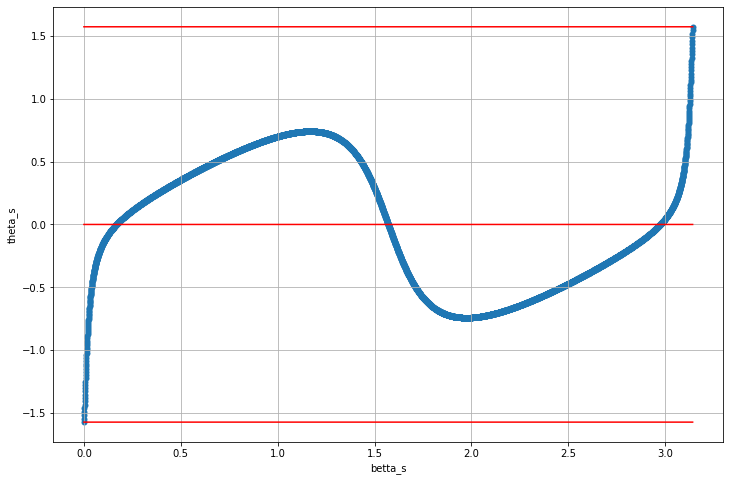

In [7]:
x = np.linspace(0, np.pi,5000)
plt.figure(figsize=(12,8))
plt.scatter(x, F_betta(M0, x), linewidths=0.01)
plt.plot(x,[0]*len(x), c='r')
plt.plot(x,[ np.pi/2]*len(x), c='r')
plt.plot(x,[-np.pi/2]*len(x), c='r')
plt.xlabel('betta_s')
plt.ylabel('theta_s')
plt.grid()
plt.savefig('fig')
plt.show()


## Алгоритм

In [6]:
global M0, C0, D0, P0
global Gam, alpha
global eps

Gam = 1.4
alpha = 28 * np.pi / 180
eps = np.pi / (180 * 100)

M0 = 6
D0 = 1
P0 = 1
C0 = np.sqrt(Gam * P0 / D0)

In [8]:
def calc_ij(betta_s, betta_r):
    
    def catch_warning(x):
        if x < 0:
            raise Exception()
        return x
    
#     Считаем значения для области 1
    try:
        theta_s = catch_warning(F_betta(M0, betta_s))
        M1 = catch_warning(F_M(M0, betta_s))
        C1 = catch_warning(F_C(M0, betta_s, C0))
        D1 = catch_warning(F_D(M0, betta_s, D0))
        P1 = catch_warning(F_P(M0, betta_s, P0))

    #     Считаем значения для области 2
        theta_r = catch_warning(F_betta(M1, betta_r))
        if abs(theta_s + theta_r - alpha) >= eps: return np.nan, np.nan, np.nan
        if (betta_s <= theta_s or betta_r <= theta_r): return np.nan, np.nan, np.nan
        M2 = catch_warning(F_M(M1, betta_r))
        C2 = catch_warning(F_C(M1, betta_r, C1))
        D2 = catch_warning(F_D(M1, betta_r, D1))
        P2 = catch_warning(F_P(M1, betta_r, P1))

#         if (theta_r < 0 or M2 < 0 or C2 < 0 or D2 < 0 or P2 < 0):
#             return theta_s, theta_r, np.nan
    except:
        return np.nan, np.nan, np.nan
    
#     Считаем диссипацию
    F_diss = F(M0, C0, D0, P0,
               M1, C1, D1, P1,
               M2, C2, D2, P2,
               betta_s, theta_s, betta_r, theta_r)
    
    return theta_s, theta_r, F_diss

# def calc_ij(betta_s, betta_r): упроощенная версия без ограничений
# #     Считаем значения для области 1
#     theta_s = (F_betta(M0, betta_s))
#     M1 = (F_M(M0, betta_s))
#     C1 = (F_C(M0, betta_s, C0))
#     D1 = (F_D(M0, betta_s, D0))
#     P1 = (F_P(M0, betta_s, P0))

# #     Считаем значения для области 2
#     theta_r = (F_betta(M1, betta_r))
#     M2 = (F_M(M1, betta_r))
#     C2 = (F_C(M1, betta_r, C1))
#     D2 = (F_D(M1, betta_r, D1))
#     P2 = (F_P(M1, betta_r, P1))
    
# #     Считаем диссипацию
#     F_diss = F(M0, C0, D0, P0,
#                M1, C1, D1, P1,
#                M2, C2, D2, P2,
#                betta_s, theta_s, betta_r, theta_r)
    
#     return theta_s, theta_r, F_diss

In [9]:
%%time

delta = 0.001

# задаем сетку для переменных betta
betta_s = np.arange(0.01, np.pi / 2, delta)
betta_r = np.arange(0.01, np.pi / 2, delta)
indx = range(len(betta_s))
F_diss = np.zeros([len(betta_s), len(betta_r)])
theta_s = np.zeros([len(betta_s), len(betta_r)])
theta_r = np.zeros([len(betta_s), len(betta_r)])

for i in range(len(betta_s)):
    for j in range(len(betta_r)):
        theta_s[i][j], theta_r[i][j], F_diss[i][j] = calc_ij(betta_s[i], betta_r[j])
    if i % 200 == 0:
        print(i)

0
200
400
600
800
1000
1200
1400
CPU times: user 1min 32s, sys: 414 ms, total: 1min 32s
Wall time: 1min 33s


### Печать не nan результатов

In [10]:
not_nan_indxs = []

for i in range(len(betta_s)):
    for j in range(len(betta_r)):
        if np.isnan(F_diss[i][j]) == False:
            not_nan_indxs += [[i, j]]

# for n in range(len(not_nan_indxs)):
#     print(n, F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]])
#     print('theta_s = {0}'.format(radian_to_dergee(theta_s[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
#     print('theta_r = {0}'.format(radian_to_dergee(theta_r[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
#     print('betta_s = {0}'.format(radian_to_dergee(betta_s[not_nan_indxs[n][0]])))
#     print('betta_r = {0}'.format(radian_to_dergee(betta_r[not_nan_indxs[n][1]])))
#     print("==================================================================================")

### Печать TOP 10 не nan результатов

In [11]:
not_nan_F_diss = [F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]] for n in range(len(not_nan_indxs))]
top_10_indxs = sorted(range(len(not_nan_F_diss)), key=lambda k: not_nan_F_diss[k])[:10]

for n in top_10_indxs:
    print(n, F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]])
    print('theta_s = {0}'.format(radian_to_dergee(theta_s[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
    print('theta_r = {0}'.format(radian_to_dergee(theta_r[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
    print('betta_s = {0}'.format(radian_to_dergee(betta_s[not_nan_indxs[n][0]])))
    print('betta_r = {0}'.format(radian_to_dergee(betta_r[not_nan_indxs[n][1]])))
    print("==================================================================================")
    
n = top_10_indxs[0]
betta_best_s = betta_s[not_nan_indxs[n][0]]
betta_best_r = betta_r[not_nan_indxs[n][1]]

48 28.02843699747573
theta_s = 6.737444911039696
theta_r = 21.27044363442258
betta_s = 14.610423775835981
betta_r = 31.11160827560368
52 28.080292671341343
theta_s = 8.349747505396595
theta_r = 19.65745997299081
betta_s = 16.04281826366304
betta_r = 29.679213787776618
46 28.10107357198204
theta_s = 6.67101083112774
theta_r = 21.33343993155034
betta_s = 14.553127996322898
betta_r = 31.168904055116762
53 28.143026894791035
theta_s = 8.412471962390097
theta_r = 19.591319589009927
betta_s = 16.10011404317612
betta_r = 29.621918008263535
45 28.18089033010419
theta_s = 6.6044124642935085
theta_r = 21.39632647384759
betta_s = 14.495832216809816
betta_r = 31.226199834629842
54 28.20961671613101
theta_s = 8.475072513391977
theta_r = 19.52504679127563
betta_s = 16.157409822689203
betta_r = 29.564622228750455
44 28.26809768392575
theta_s = 6.537647969750537
theta_r = 21.4591040743368
betta_s = 14.438536437296731
betta_r = 31.283495614142925
55 28.279995164538107
theta_s = 8.537550364961943
theta_

### Автоматизируем

In [61]:
%%time

delta = 0.005
start_s = start_r = 0.01
end_s = end_r = np.pi / 2

error = 1

while (error > np.pi / (180 * 1000)):
    # задаем сетку для переменных betta
    betta_s = np.arange(start_s, end_s, delta)
    betta_r = np.arange(start_r, end_r, delta)
    indx = range(len(betta_s))
    F_diss = np.zeros([len(betta_s), len(betta_r)])
    theta_s = np.zeros([len(betta_s), len(betta_r)])
    theta_r = np.zeros([len(betta_s), len(betta_r)])

    for i in range(len(betta_s)):
        for j in range(len(betta_r)):
            theta_s[i][j], theta_r[i][j], F_diss[i][j] = calc_ij(betta_s[i], betta_r[j])
#         if i % 200 == 0:
#             print(i)

    not_nan_indxs = []

    for i in range(len(betta_s)):
        for j in range(len(betta_r)):
            if np.isnan(F_diss[i][j]) == False:
                not_nan_indxs += [[i, j]]

    not_nan_F_diss = [F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]] for n in range(len(not_nan_indxs))]
    top_10_indxs = sorted(range(len(not_nan_F_diss)), key=lambda k: not_nan_F_diss[k])[:10]

#     for n in top_10_indxs:
#         print(n, F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]])
#         print('theta_s = {0}'.format(radian_to_dergee(theta_s[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
#         print('theta_r = {0}'.format(radian_to_dergee(theta_r[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
#         print('betta_s = {0}'.format(radian_to_dergee(betta_s[not_nan_indxs[n][0]])))
#         print('betta_r = {0}'.format(radian_to_dergee(betta_r[not_nan_indxs[n][1]])))
#         print("==================================================================================")

    n = top_10_indxs[0]
    betta_best_s = betta_s[not_nan_indxs[n][0]]
    betta_best_r = betta_r[not_nan_indxs[n][1]]
    print(n, F_diss[not_nan_indxs[n][0]][not_nan_indxs[n][1]])
    print('theta_s = {0}'.format(radian_to_dergee(theta_s[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
    print('theta_r = {0}'.format(radian_to_dergee(theta_r[not_nan_indxs[n][0]][not_nan_indxs[n][1]])))
    print('betta_s = {0}'.format(radian_to_dergee(betta_s[not_nan_indxs[n][0]])))
    print('betta_r = {0}'.format(radian_to_dergee(betta_r[not_nan_indxs[n][1]])))
    print(radian_to_dergee(theta_s[not_nan_indxs[n][0]][not_nan_indxs[n][1]]) + 
          radian_to_dergee(theta_r[not_nan_indxs[n][0]][not_nan_indxs[n][1]]))
    print("==================================================================================")
    
    start_s = betta_best_s - 2*delta
    start_r = betta_best_r - 2*delta
    end_s =  betta_best_s + 2*delta
    end_r =  betta_best_r + 2*delta
    delta /= 2

1 30.02261990875177
theta_s = 9.581990805963063
theta_r = 18.411898401618952
betta_s = 17.188733853924695
betta_r = 28.647889756541158
27.993889207582015
0 30.02261990875177
theta_s = 9.581990805963063
theta_r = 18.411898401618952
betta_s = 17.188733853924695
betta_r = 28.647889756541158
27.993889207582015
0 29.865169281242675
theta_s = 9.506273327114874
theta_r = 18.497710475317604
betta_s = 17.117114129533338
betta_r = 28.719509480932498
28.00398380243248
0 29.557525780890927
theta_s = 9.35434507368128
theta_r = 18.63650791528201
betta_s = 16.973874680750633
betta_r = 28.826939067519522
27.99085298896329
0 29.4495326343918
theta_s = 9.297199985919603
theta_r = 18.70041344771293
betta_s = 16.920159887457118
betta_r = 28.880653860813055
27.99761343363253
0 29.377308245523036
theta_s = 9.259050493832337
theta_r = 18.734926599320524
betta_s = 16.884350025261444
betta_r = 28.907511257459802
27.99397709315286
0 29.34164122503409
theta_s = 9.239959826640824
theta_r = 18.75216667166337
betta

0 29.306216605859625
theta_s = 9.220858522931046
theta_r = 18.76914147706904
betta_s = 16.848540180276203
betta_r = 28.934084616118295
27.990000000000087
0 29.306216605859095
theta_s = 9.220858522930765
theta_r = 18.769141477069283
betta_s = 16.848540180275943
betta_r = 28.934084616118476
27.990000000000048
0 29.306216605858843
theta_s = 9.220858522930627
theta_r = 18.769141477069404
betta_s = 16.848540180275812
betta_r = 28.934084616118575
27.99000000000003
0 29.306216605858733
theta_s = 9.220858522930559
theta_r = 18.76914147706945
betta_s = 16.84854018027575
betta_r = 28.934084616118607
27.99000000000001
0 29.306216605858687
theta_s = 9.220858522930532
theta_r = 18.76914147706947
betta_s = 16.848540180275727
betta_r = 28.93408461611861
27.990000000000002
2 29.30621660585865
theta_s = 9.22085852293052
theta_r = 18.76914147706949
betta_s = 16.848540180275712
betta_r = 28.93408461611863
27.99000000000001
7 29.306216605858673
theta_s = 9.220858522930538
theta_r = 18.769141477069464
bett

IndexError: list index out of range

### Распределение F(betta_s, betta_r)

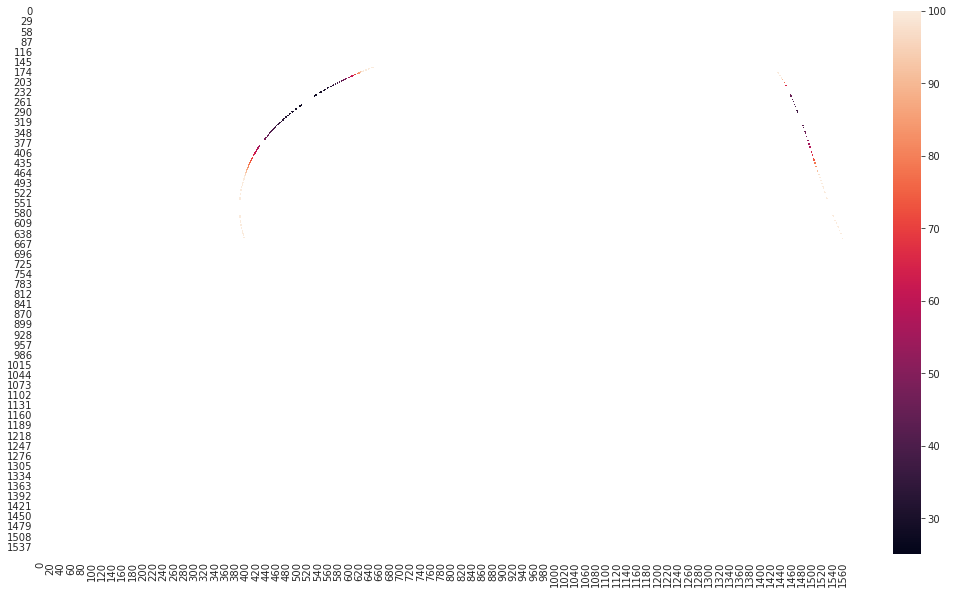

In [17]:
import seaborn as sns

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(F_diss, 
                     vmin=25, vmax=100) 
#                      xticklabels=radian_to_dergee(betta_s), yticklabels=radian_to_dergee(betta_r))

### Ниже склад старых блоков

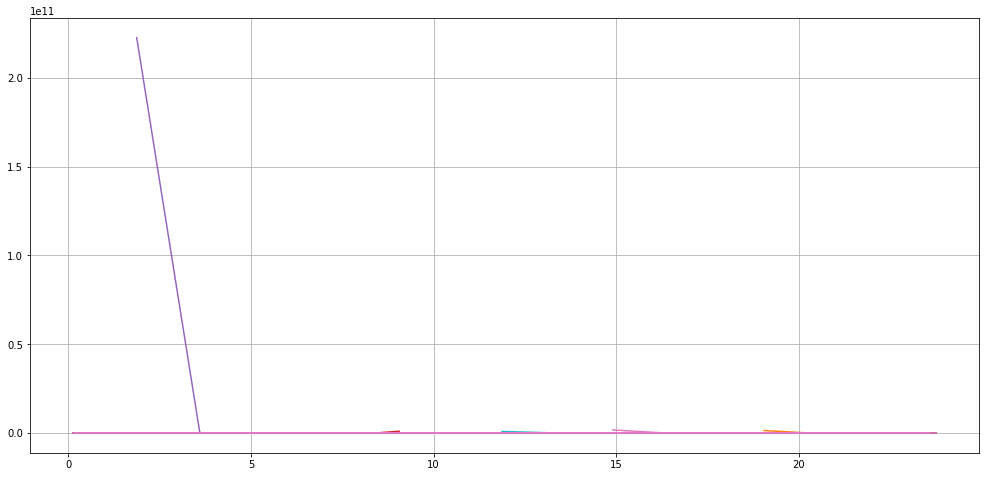

In [296]:
plt.figure(figsize=(17,8))
plt.plot(radian_to_dergee(theta_s), F_diss)
plt.grid()
plt.show()

In [37]:
def deriv(arr, delta):
    return (arr[1:] - arr[:-1]) / delta

In [38]:
first_deriv = deriv(F_diss, delta)
second_deriv = deriv(first_deriv, delta)



In [39]:
# min_value = 1000000
# min_indx = None

# for i in range(1, len(first_deriv) - 1):
#     if (first_deriv[i] < min_value and first_deriv[i-1] * first_deriv[i+1] < 0):
#         min_value = first_deriv[i]
#         min_indx = i
        
# print(min_indx, min_value)

min_indx = np.argmin(abs(first_deriv))
print('theta_s = {0}'.format(radian_to_dergee(theta_s[min_indx])))
print('theta_r = {0}'.format(radian_to_dergee(theta_r[min_indx])))
print('betta_s = {0}'.format(radian_to_dergee(betta_s[min_indx])))
print('betta_r = {0}'.format(radian_to_dergee(betta_r[min_indx])))

print('theta_r + theta_s = {0}'.format(radian_to_dergee(theta_s[min_indx] + theta_r[min_indx])))

IndexError: index 491 is out of bounds for axis 0 with size 30

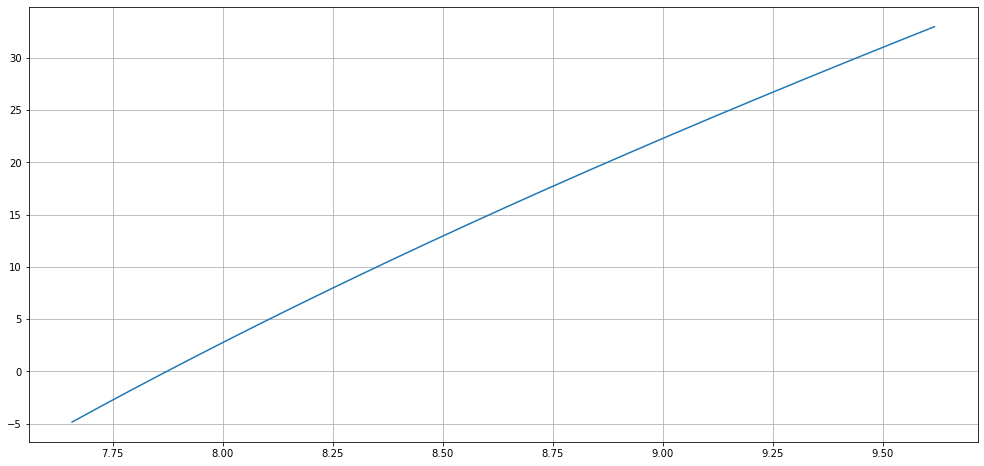

In [399]:
first_deriv = deriv(F_diss, delta)
plt.figure(figsize=(17,8))
plt.plot(radian_to_dergee(theta_s[:-1]), first_deriv)
plt.grid()
plt.show()

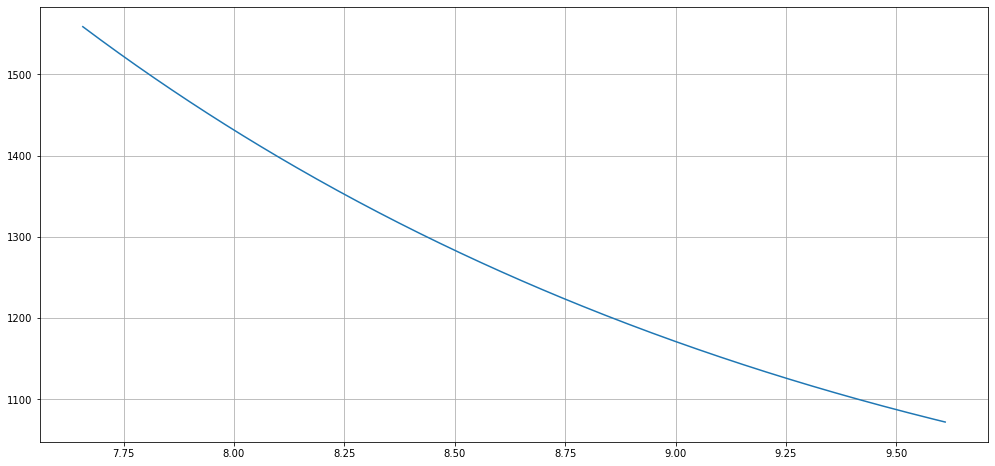

In [400]:
second_deriv = deriv(first_deriv, delta)
plt.figure(figsize=(17,8))
plt.plot(radian_to_dergee(theta_s[:-2]), second_deriv)
plt.grid()
plt.show()

0.08050847457627118

In [62]:
# 3
theta_s = 1.9 / 17.8
betta_s = 4.3 / 17.3
betta_r = 7 / 10

print('theta_s = ', radian_to_dergee(np.arcsin(theta_s)))
print('betta_s = ', radian_to_dergee(np.arcsin(betta_s)))
print('theta_r = ', radian_to_dergee(alpha) - radian_to_dergee(np.arcsin(theta_s)))
print('betta_r = ', radian_to_dergee(np.arcsin(betta_r)))

theta_s =  6.127515328428542
betta_s =  14.392015869065196
theta_r =  21.872484671571456
betta_r =  44.4270040008057


In [65]:
# 2
theta_s = 1.5 / 14.7
betta_s = 3.3 / 14.7
betta_r = 3 / 4.9

print('theta_s = ', radian_to_dergee(np.arcsin(theta_s)))
print('betta_s = ', radian_to_dergee(np.arcsin(betta_s)))
print('theta_r = ', radian_to_dergee(alpha) - radian_to_dergee(np.arcsin(theta_s)))
print('betta_r = ', radian_to_dergee(np.arcsin(betta_r)))

theta_s =  5.856701909918286
betta_s =  12.972878150750649
theta_r =  22.143298090081714
betta_r =  37.752001306172986


In [67]:
# 1
theta_s = 1.2 / 12.2
betta_s = 2.65 / 12.2
betta_r = 2.35 / 3.9

print('theta_s = ', radian_to_dergee(np.arcsin(theta_s)))
print('betta_s = ', radian_to_dergee(np.arcsin(betta_s)))
print('theta_r = ', radian_to_dergee(alpha) - radian_to_dergee(np.arcsin(theta_s)))
print('betta_r = ', radian_to_dergee(np.arcsin(betta_r)))

theta_s =  5.644777552371437
betta_s =  12.54539835187332
theta_r =  22.355222447628563
betta_r =  37.05375953464212


In [50]:
# SA
theta_s = 0.2 / 16.35
betta_s = 3.2 / 16.35
betta_r = 3.5 / 5

print('theta_s = ', radian_to_dergee(np.arcsin(theta_s)))
print('betta_s = ', radian_to_dergee(np.arcsin(betta_s)))
print('theta_r = ', radian_to_dergee(alpha) - radian_to_dergee(np.arcsin(theta_s)))
print('betta_r = ', radian_to_dergee(np.arcsin(betta_r)))

theta_s =  0.7008832842769289
betta_s =  11.286708434542321
theta_r =  27.29911671572307
betta_r =  44.4270040008057
